## Construct a multiple linear regression model with interactions

In [19]:
# https://r-data.pmagunia.com/dataset/r-dataset-package-car-florida

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Set color map to have light blue background
sns.set()
votes = pd.read_csv('dataset-62310.csv')


In [21]:
votes = votes[['GORE', 'BUSH', 'BUCHANAN', 'NADER']]
votes = votes.reset_index().rename(columns={'index': 'county'})

In [22]:
votes.head()


,county,GORE,BUSH,BUCHANAN,NADER
0,ALACHUA,47300,34062,262,3215
1,BAKER,2392,5610,73,53
2,BAY,18850,38637,248,828
3,BRADFORD,3072,5413,65,84
4,BREVARD,97318,115185,570,4470


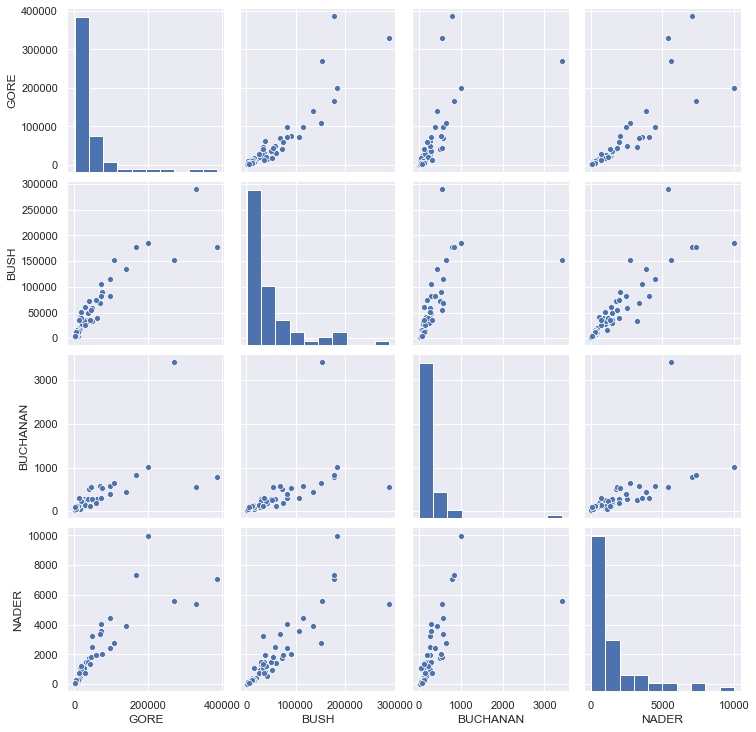

In [23]:
# plot a pair plot of the data using the seaborn library
sns.pairplot(votes)

# save the image
plt.savefig('pair_plot.png', dpi=300, bbox_inches='tight')

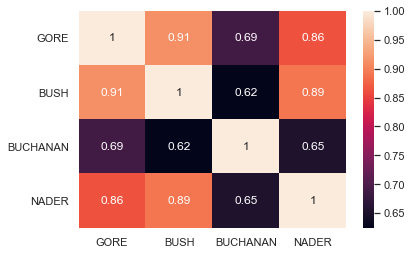

In [24]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

# calculate correlation coefficients
corr_matrix = votes.corr()
sns.heatmap(corr_matrix, annot=True)

In [25]:
votes.isnull().sum()

county      0
GORE        0
BUSH        0
BUCHANAN    0
NADER       0
dtype: int64

In [8]:
# Construct a multi-linear model called model without interaction terms predicting 
# the Bush column on the other columns and print out the summary table

In [9]:
import pandas as pd
import statsmodels.formula.api as smf

# construct a multiple linear regression model without interaction terms predicting the Bush column on the other columns
model = smf.ols('BUSH ~ GORE + NADER + BUCHANAN', data=votes).fit()

# print the summary table for the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   BUSH   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     148.6
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           1.60e-28
Time:                        21:36:40   Log-Likelihood:                -758.29
No. Observations:                  67   AIC:                             1525.
Df Residuals:                      63   BIC:                             1533.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8728.0651   3126.127      2.792      0.0

In [10]:
# BUCHANAN is insignificant features 

### Multi-linear with interactions

In [11]:
# construct a multiple linear regression model with interactions
model_multi = smf.ols('BUSH ~ GORE * NADER * BUCHANAN', data=votes).fit()

# print the summary table for the model
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   BUSH   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     167.2
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           1.80e-36
Time:                        21:36:40   Log-Likelihood:                -726.52
No. Observations:                  67   AIC:                             1469.
Df Residuals:                      59   BIC:                             1487.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3129.7554   3

In [12]:
# construct a multiple linear regression model with interactions
model_multi = smf.ols('BUSH ~ GORE  +  NADER + BUCHANAN + NADER:BUCHANAN', data=votes).fit()

# print the summary table for the model
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   BUSH   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     157.0
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           1.06e-31
Time:                        21:36:40   Log-Likelihood:                -747.54
No. Observations:                  67   AIC:                             1505.
Df Residuals:                      62   BIC:                             1516.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2066.1821   3488.710     -0.

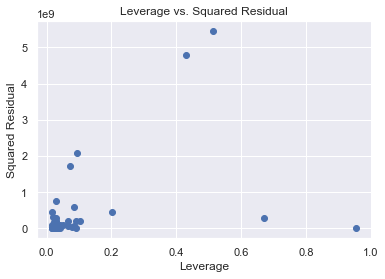

In [13]:
# plot the leverage vs. the square of the residual

import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np



# construct a multiple linear regression model with interactions
model_multi = smf.ols('BUSH ~ GORE  +  NADER + BUCHANAN + NADER:BUCHANAN', data=votes).fit()

# calculate the leverage and residuals for the model
leverage = model_multi.get_influence().hat_matrix_diag
residuals = model_multi.resid

# plot the leverage vs. the square of the residual
fig, ax = plt.subplots()
ax.scatter(leverage, residuals**2)
ax.set_xlabel('Leverage')
ax.set_ylabel('Squared Residual')
ax.set_title('Leverage vs. Squared Residual')
plt.show()

In [14]:
unusual = []
for i in range(len(leverage)):
    if leverage[i] > 0.4 or residuals[i]**2 > 1e9:
        unusual.append(i)

# print out the unusual rows
print("Unusual Rows:")
print(votes.iloc[unusual])

# print out the indices, leverage, and residual squared for the unusual rows
print("\nUnusual Rows Information:")
for i in unusual:
    print(f"Index: {i}, Leverage: {leverage[i]:.3f}, Residual Squared: {residuals[i]**2:.3f}")

Unusual Rows:
        county    GORE    BUSH  BUCHANAN  NADER
0      ALACHUA   47300   34062       262   3215
5      BROWARD  386518  177279       789   7099
12        DADE  328702  289456       561   5355
15       DUVAL  107680  152082       650   2752
49  PALM.BEACH  268945  152846      3407   5564
51    PINELLAS  199660  184312      1010   9986

Unusual Rows Information:
Index: 0, Leverage: 0.071, Residual Squared: 1735531760.760
Index: 5, Leverage: 0.513, Residual Squared: 5461151079.043
Index: 12, Leverage: 0.429, Residual Squared: 4782619144.669
Index: 15, Leverage: 0.092, Residual Squared: 2090651561.761
Index: 49, Leverage: 0.956, Residual Squared: 17818898.404
Index: 51, Leverage: 0.671, Residual Squared: 281299473.024


In [17]:
# identify unusual rows with high leverage and/or high residual squared
unusual = []
for i in range(len(leverage)):
    if leverage[i] > 0.4 or residuals[i]**2 > 1e9:
        unusual.append(i)
print(unusual)
# drop the unusual rows from the votes DataFrame
votes_clean = votes.drop([0, 5])

# build the model again using the cleaned data
# construct a multiple linear regression model with interactions
model_multi = smf.ols('BUSH ~ GORE  +  NADER + BUCHANAN + NADER:BUCHANAN', data=votes_clean).fit()

# print out the summary table for the cleaned model
print(model_multi.summary())

[0, 5, 12, 15, 49, 51]
                            OLS Regression Results                            
Dep. Variable:                   BUSH   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     425.0
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           2.86e-43
Time:                        21:38:41   Log-Likelihood:                -691.82
No. Observations:                  65   AIC:                             1394.
Df Residuals:                      60   BIC:                             1405.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1003.